<a href="https://colab.research.google.com/github/kdambrowski/Data_science/blob/main/RECRUITMENT_TASK_Industry_4_0_optic_sensors_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Liblary

In [31]:
import os
import shutil

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize, OneHotEncoder
from sklearn.metrics import roc_auc_score

# Download datas

In [2]:
!gdown --folder https://drive.google.com/drive/folders/1ha7P4Mwp6_XYnUHs20460CbBC4zwNvf9

Retrieving folder list
Retrieving folder 1jZJ0Ez5vUDkgCzXYeZFaZr9lDEtwgynS sesion_01_20
Processing file 1LM9mCShE-5yAtVYFmjvT8gqgnCr9s2rW sensor01_air.txt
Processing file 17DfvpSqYgEA4R_DijRwWgS7XsUXZeYkS sensor01_izopropanol.txt
Processing file 1TGUQyhJjhDx3qp05e4Zfv6Z20DLUur4y sensor01_water.txt
Retrieving folder 16aAwB8IXUI7ZlEoxhSR08cVtGorzuC7B sesion_02_20
Processing file 148xK-bCWO35H9wrOJQDu5dGsHOPWy68C sensor02_air.txt
Processing file 1ZFFpmp86fOPdrt38jZm-a8LDFDcGBq4z sensor02_izopropanol.txt
Processing file 1B-IEuA0PxgPtfbdqYZe3JrSMGKm2WN2u sensor02_water.txt
Retrieving folder 1C83NkvGCkIH503gFHIH2o0BC2nOpLWj2 sesion_03_20
Processing file 1kEZRMklztXEbu59E10p6m09lX7A8jCAO sensor03_air.txt
Processing file 1ZVmOBZEMF48U0tE9E5iqN-aHtnKaBNch sensor03_izopropanol.txt
Processing file 1Y5_mQESCc7hYiHG14HfBcvLNND5fZ_ao sensor03_water.txt
Retrieving folder 1ogErYANmwr3ev0NHep5OEcj7eJRJU2O9 sesion_04_20
Processing file 1aktTnDg_iuQbFkARU5eyRFwbtL93oZII sensor04_air.txt
Processing file 1

#defining functions

In [3]:
def jpg_file_renamed(folder_path, prefix, sufix_counter=False):
  """Changing name of files in indicated folder, add to regular name prefix
  and is possibility to add sufix_counter on the end of regular name.
  Sufix starts with 0 value
  """
  prefix_str = str(prefix)
  additional_slash = '/'
  folder_path_slash = folder_path + additional_slash
  folder_elements = os.listdir(folder_path_slash)
  if sufix_counter:
    sufix_counter = 0
    for file_name in folder_elements:
      source = folder_path_slash + file_name
      destination = folder_path_slash + prefix+"_" + file_name + str(sufix_counter)
      #result = ....ColoredDiceDataset/1/prefix000108sufix.jpg
      os.rename(source, destination)
      sufix_counter +=1
  else:          
    for file_name in folder_elements:
      source = folder_path_slash + file_name
      destination = folder_path_slash + prefix +"_" + file_name
      #result = ....ColoredDiceDataset/1/1000108.jpg
      os.rename(source, destination)
  previous_example_2_eg = folder_elements[:2]
  results_2_eg= os.listdir(folder_path)[:2]
  return print('All files renamed successfully in indicated path',
               f'\nprevious name: {previous_example_2_eg}',
               f'\ncurrent name:{results_2_eg}\n') 

# Preprocessing

Settings and variables


In [4]:
upper_path_of_folder = '/content/Dataset'
path_air_result_folder ='/content/air_result_folder/'
path_isopropanol_result_folder ='/content/isopropanol_result_folder/'
path_water_result_folder ='/content/water_result_folder/'


In [5]:
# data_path = upper_path_of_folder
# data_dir = os.listdir(data_path)
# for fits_dir in data_dir:
#     fits_path = data_path + "/"
#     print(fits_path)
#     for second_dir in os.listdir(fits_path):
#       second_path = second_dir
#       print(second_path)
#       for file in os.listdir(second_path):
#         print(file)
# #if 'air' in file.split("_")[0][-3:]:
# #shutil.copy(fits_path + "/" + file, path_air_result_folder)

In [6]:
os.mkdir(path_air_result_folder)
os.mkdir(path_isopropanol_result_folder)
os.mkdir(path_water_result_folder)

In [33]:
for sesion_dir in os.listdir(upper_path_of_folder):
  sesion_path =upper_path_of_folder + '/' + sesion_dir + '/'
  # print(sesion_path)
  # print()
  for files in os.listdir(sesion_path):
    file_name_split = files.split("_")
    testing_medium = file_name_split[1].split('.')
    medium_name = testing_medium[0]
    # print(medium_name,files, sep='+++\n')
    if 'air' in medium_name:
      # print(files)
      shutil.copy(sesion_path + files, path_air_result_folder)
    if 'izopropanol' in medium_name:
      # print(files)
      shutil.copy(sesion_path + files, path_isopropanol_result_folder)
    if 'water' in medium_name:
      # print(files)
      shutil.copy(sesion_path + files, path_water_result_folder)



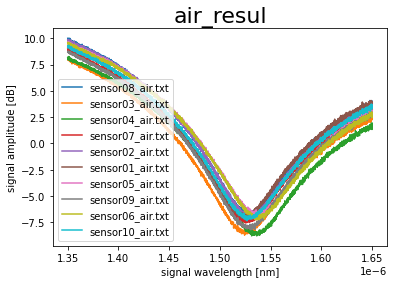

In [34]:
# datas_air_list = []
fig, ax = plt.subplots()
for f in os.listdir(path_air_result_folder):
    direct_file_path = path_air_result_folder + f
    df = pd.read_csv(direct_file_path,
            header=0,
            names = np.array(['signal wavelength [nm]','signal amplitude [dB]']
                             ))
    ax.plot(df['signal wavelength [nm]'],df['signal amplitude [dB]'], label=f)
plt.title('air_resul', fontsize=22)
plt.xlabel('signal wavelength [nm]')
plt.ylabel('signal amplitude [dB]')
plt.legend()
plt.show()

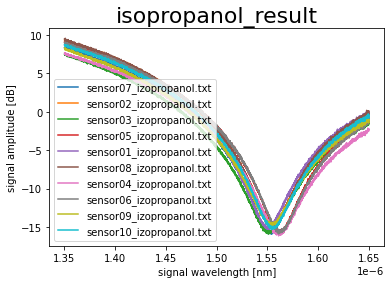

In [35]:
# datas_air_list = []
fig, ax = plt.subplots()
for f in os.listdir(path_isopropanol_result_folder):
    direct_file_path = path_isopropanol_result_folder + f
    df = pd.read_csv(direct_file_path,
            header=0,
            names = np.array(['signal wavelength [nm]','signal amplitude [dB]']
                             ))
    ax.plot(df['signal wavelength [nm]'],df['signal amplitude [dB]'],label=f)

plt.title('isopropanol_result', fontsize=22)
plt.xlabel('signal wavelength [nm]')
plt.ylabel('signal amplitude [dB]')
plt.legend()
plt.show()

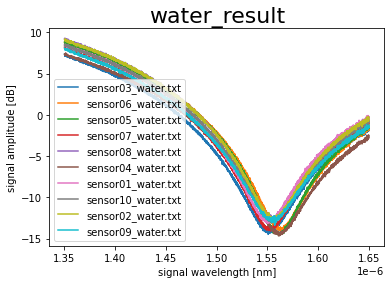

In [36]:
# datas_air_list = []
fig, ax = plt.subplots()
for f in os.listdir(path_water_result_folder):
    direct_file_path = path_water_result_folder + f
    df = pd.read_csv(direct_file_path,
            header=0,
            names = np.array(['signal wavelength [nm]','signal amplitude [dB]']
                             ))
    ax.plot(df['signal wavelength [nm]'],df['signal amplitude [dB]'], label = f)
plt.title('water_result', fontsize=22)
plt.xlabel('signal wavelength [nm]')
plt.ylabel('signal amplitude [dB]')
plt.legend()
plt.show()

In [37]:
for f in os.listdir(path_water_result_folder):
    direct_file_path = path_water_result_folder + f
    df = pd.read_csv(direct_file_path,
            header=0,
            names = np.array(['signal wavelength [nm]','signal amplitude [dB]']))
    print(df.describe())
    

       signal wavelength [nm]  signal amplitude [dB]
count            3.000000e+03            3000.000000
mean             1.500050e-06              -2.742071
std              8.661697e-08               6.383997
min              1.350100e-06             -14.486000
25%              1.425075e-06              -7.710775
50%              1.500050e-06              -2.790100
75%              1.575025e-06               3.161650
max              1.650000e-06               7.374600
       signal wavelength [nm]  signal amplitude [dB]
count            3.000000e+03            3000.000000
mean             1.500050e-06              -1.512439
std              8.661697e-08               6.822813
min              1.350100e-06             -14.003000
25%              1.425075e-06              -6.861600
50%              1.500050e-06              -1.868100
75%              1.575025e-06               4.876350
max              1.650000e-06               8.881000
       signal wavelength [nm]  signal amplitud

In [38]:
water_frames = []
for f in os.listdir(path_water_result_folder):
    direct_file_path = path_water_result_folder + f
    df = pd.read_csv(direct_file_path,
            header=0,
            names = np.array(['water_frames signal wavelength [nm]','water_frames signal amplitude [dB]']))
    df['sensor_no'] = f.split('_')[0]
    df['water_frames signal wavelength [nm]']=df['water_frames signal wavelength [nm]']*10**9
    water_frames.append(df)

combine_dfs_water_result = pd.concat(water_frames)
combine_dfs_water_result.value_counts('sensor_no')

sensor_no
sensor01    3000
sensor02    3000
sensor03    3000
sensor04    3000
sensor05    3000
sensor06    3000
sensor07    3000
sensor08    3000
sensor09    3000
sensor10    3000
dtype: int64

In [39]:
izo_frames = []
for f in os.listdir(path_isopropanol_result_folder):
    direct_file_path = path_isopropanol_result_folder + f
    df = pd.read_csv(direct_file_path,
            header=0,
            names = np.array(['izo_frames signal wavelength  [nm]','izo_frames signal amplitude [dB]']))
    df['sensor_no'] = f.split('_')[0]
    df['izo_frames signal wavelength  [nm]']=df['izo_frames signal wavelength  [nm]']*10**9
    izo_frames.append(df)

combine_dfs_isopropanol_result = pd.concat(izo_frames)
combine_dfs_isopropanol_result.value_counts('sensor_no')

sensor_no
sensor01    3000
sensor02    3000
sensor03    3000
sensor04    3000
sensor05    3000
sensor06    3000
sensor07    3000
sensor08    3000
sensor09    3000
sensor10    3000
dtype: int64

In [40]:
air_frames = []
for f in os.listdir(path_air_result_folder):
    direct_file_path = path_air_result_folder + f
    df = pd.read_csv(direct_file_path,
            header=0,
            names = np.array(['air_frames signal wavelength [nm]','air_frames signal amplitude [dB]']))
    df['sensor_no'] = f.split('_')[0]
    df['air_frames signal wavelength [nm]']=df['air_frames signal wavelength [nm]']*10**9
    air_frames.append(df)

combine_dfs_air_result = pd.concat(air_frames)
combine_dfs_air_result.value_counts('sensor_no')

sensor_no
sensor01    3000
sensor02    3000
sensor03    3000
sensor04    3000
sensor05    3000
sensor06    3000
sensor07    3000
sensor08    3000
sensor09    3000
sensor10    3000
dtype: int64

In [41]:
combine_dfs_air_result.std()

<ipython-input-41-9034224be54e>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  combine_dfs_air_result.std()


air_frames signal wavelength [nm]    86.603979
air_frames signal amplitude [dB]      4.902206
dtype: float64

In [42]:
group_sensor_by_min_dB = combine_dfs_air_result.groupby('sensor_no').agg({'air_frames signal wavelength [nm]':'min'})

In [43]:
combine_dfs_isopropanol_result[combine_dfs_isopropanol_result.columns]

,izo_frames signal wavelength [nm],izo_frames signal amplitude [dB],sensor_no
0,1350.1,8.32460,sensor07
1,1350.2,8.29750,sensor07
2,1350.3,8.33000,sensor07
3,1350.4,8.26280,sensor07
4,1350.5,8.28260,sensor07
...,...,...,...
2995,1649.6,-0.61478,sensor10
2996,1649.7,-0.53629,sensor10
2997,1649.8,-0.81838,sensor10
2998,1649.9,-0.57202,sensor10


In [44]:
# # all_datas_gather = combine_dfs_air_result.join(combine_dfs_isopropanol_result[combine_dfs_isopropanol_result.columns])
# # all_datas_gather

# first_merge = combine_dfs_isopropanol_result[combine_dfs_isopropanol_result.columns].merge(combine_dfs_air_result)

In [45]:
all_datas_gather = pd.concat([combine_dfs_air_result, combine_dfs_isopropanol_result, combine_dfs_water_result], axis=1)

In [50]:
dB_columns=[]
for column in all_datas_gather.columns:
  if '[dB]' in column:
    dB_columns.append(column)

In [52]:
all_datas_gather[dB_columns]

,air_frames signal amplitude [dB],izo_frames signal amplitude [dB],water_frames signal amplitude [dB]
0,10.0010,8.32460,7.3520
1,9.9366,8.29750,7.3746
2,9.8126,8.33000,7.2810
3,9.8773,8.26280,7.0982
4,9.7859,8.28260,7.1982
...,...,...,...
2995,3.2784,-0.61478,-1.5635
2996,3.4213,-0.53629,-1.4177
2997,3.3112,-0.81838,-1.5810
2998,3.4500,-0.57202,-1.2834


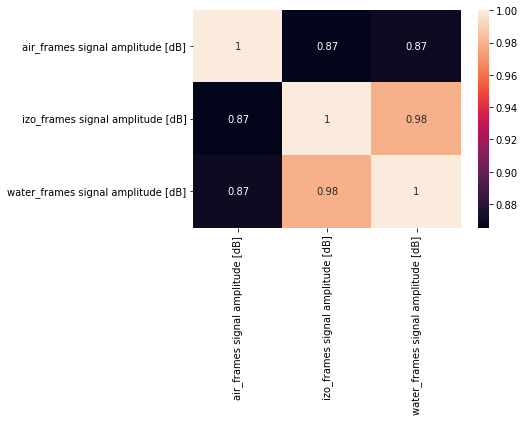

In [53]:
sns.heatmap(all_datas_gather[dB_columns].corr(), annot=True)